<a href="https://colab.research.google.com/github/jasonchristoo/servicecomplaint/blob/main/Final_Project_Service_Complaint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data from : https://www.kaggle.com/datasets/taeefnajib/bank-customer-complaints

## Load Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project - Jason/customer_complaints.csv')
df

,Complaint ID,Date received,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Timely response?,Consumer disputed?,Company response to consumer
0,2738619,2017-11-27,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,No,NATIONSTAR MORTGAGE LLC,PA,189XX,Consent provided,Web,2017-11-27,Yes,Unknown,Closed with explanation
1,2933849,2018-06-12,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,No,NATIONSTAR MORTGAGE LLC,CO,80132,Consent provided,Web,2018-06-12,Yes,Unknown,Closed with explanation
2,1165653,2014-12-21,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,No,NATIONSTAR MORTGAGE LLC,CA,91701,Unknown,Web,2014-12-21,Yes,No,Closed with explanation
3,3316943,2019-07-24,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Yes,Experian Information Solutions Inc.,CA,90221,Consent not provided,Web,2019-07-24,Yes,Unknown,Closed with explanation
4,3157550,2019-02-20,"Payday loan, title loan, or personal loan",Installment loan,Struggling to pay your loan,NaN,No,Santander Consumer USA Holdings Inc.,NC,27410,Consent not provided,Web,2019-02-20,Yes,Unknown,Closed with explanation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473402,2374794,2017-03-07,Credit card,NaN,Late fee,NaN,No,JPMORGAN CHASE & CO.,CT,06611,Unknown,Referral,2017-03-13,Yes,No,Closed with monetary relief
1473403,160482,2012-09-27,Credit card,NaN,Advertising and marketing,NaN,No,DISCOVER BANK,TX,75238,Unknown,Web,2012-09-27,Yes,No,Closed with explanation
1473404,1470975,2015-07-16,Credit card,NaN,APR or interest rate,NaN,Yes,BARCLAYS BANK DELAWARE,IL,60417,Consent not provided,Web,2015-07-16,Yes,No,Closed with non-monetary relief
1473405,1250605,2015-02-21,Credit card,NaN,Sale of account,NaN,No,JPMORGAN CHASE & CO.,AL,36695,Unknown,Web,2015-02-21,Yes,Yes,Closed with explanation


## DATA UNDERSTANDING

### Statistical summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473407 entries, 0 to 1473406
Data columns (total 16 columns):
 #   Column                        Non-Null Count    Dtype 
---  ------                        --------------    ----- 
 0   Complaint ID                  1473407 non-null  int64 
 1   Date received                 1473407 non-null  object
 2   Product                       1473407 non-null  object
 3   Sub-product                   1238209 non-null  object
 4   Issue                         1473407 non-null  object
 5   Sub-issue                     918148 non-null   object
 6   Company public response       1473407 non-null  object
 7   Company                       1473407 non-null  object
 8   State                         1448899 non-null  object
 9   ZIP code                      1453137 non-null  object
 10  Consumer consent provided?    1473407 non-null  object
 11  Submitted via                 1473407 non-null  object
 12  Date sent to company          1473407 non-

In [ ]:
df.describe(include=[object])

,Date received,Product,Sub-product,Issue,Sub-issue,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Timely response?,Consumer disputed?,Company response to consumer
count,1473407,1473407,1238209,1473407,918148,1473407,1473407,1448899,1453137,1473407,1473407,1473407,1473407,1473407,1473407
unique,2952,18,76,165,218,2,5516,63,30192,5,6,2947,2,3,8
top,2017-09-08,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,No,"EQUIFAX, INC.",CA,XXXXX,Unknown,Web,2017-09-08,Yes,Unknown,Closed with explanation
freq,3551,323549,317768,199134,100750,921457,145037,199395,41312,593785,1104894,3386,1438722,705049,1153588


### Missing values & duplicate

In [ ]:
#Checking missing values
df.isnull().sum()

Complaint ID                         0
Date received                        0
Product                              0
Sub-product                     235198
Issue                                0
Sub-issue                       555259
Company public response              0
Company                              0
State                            24508
ZIP code                         20270
Consumer consent provided?           0
Submitted via                        0
Date sent to company                 0
Timely response?                     0
Consumer disputed?                   0
Company response to consumer         0
dtype: int64

Column with too much missing values will be dropped since it's not significant

In [ ]:
#Checking unique values
df.nunique()

Complaint ID                    1473407
Date received                      2952
Product                              18
Sub-product                          76
Issue                               165
Sub-issue                           218
Company public response               2
Company                            5516
State                                63
ZIP code                          30192
Consumer consent provided?            5
Submitted via                         6
Date sent to company               2947
Timely response?                      2
Consumer disputed?                    3
Company response to consumer          8
dtype: int64

In [ ]:
# Checking all unique values of product that receive complaints
df['Product'].value_counts(normalize=True)*100

Credit reporting, credit repair services, or other personal consumer reports    21.959241
Mortgage                                                                        19.912760
Debt collection                                                                 18.715738
Credit reporting                                                                 9.530904
Credit card                                                                      6.053317
Bank account or service                                                          5.850726
Credit card or prepaid card                                                      4.443579
Student loan                                                                     3.790806
Checking or savings account                                                      3.780965
Consumer Loan                                                                    2.142992
Vehicle loan or lease                                                            1.022664
Money tran

## EXPLORATORY DATA ANALYSIS

Let's look at the unique value in the "company response to consumer" column. From this perspective we can see how is complaint handled

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Closed with explanation'),
  Text(1, 0, 'Closed with non-monetary relief'),
  Text(2, 0, 'Closed with monetary relief'),
  Text(3, 0, 'Closed without relief'),
  Text(4, 0, 'Closed'),
  Text(5, 0, 'Untimely response'),
  Text(6, 0, 'Closed with relief'),
  Text(7, 0, 'In progress')])

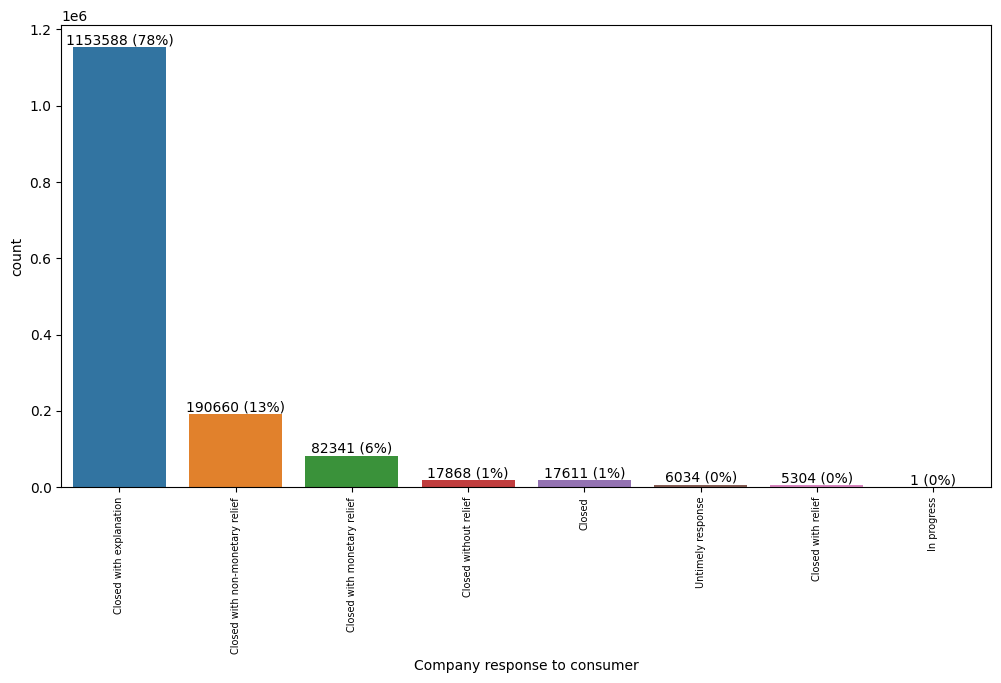

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df['Company response to consumer'],
                   order=df['Company response to consumer'].value_counts(ascending=False).index);

abs_values = df['Company response to consumer'].value_counts(ascending=False)
rel_values = df['Company response to consumer'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.xticks(rotation=90,fontsize=7)

Most of the complain handled well as we can see on the bar chart 78% of it closed with explanation

Now, we're looking consumer disputed per product.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Mortgage'),
  Text(1, 0, 'Credit reporting, credit repair services, or other personal consumer reports'),
  Text(2, 0, 'Payday loan, title loan, or personal loan'),
  Text(3, 0, 'Debt collection'),
  Text(4, 0, 'Checking or savings account'),
  Text(5, 0, 'Bank account or service'),
  Text(6, 0, 'Student loan'),
  Text(7, 0, 'Vehicle loan or lease'),
  Text(8, 0, 'Consumer Loan'),
  Text(9, 0, 'Credit card or prepaid card'),
  Text(10, 0, 'Credit reporting'),
  Text(11, 0, 'Money transfer, virtual currency, or money service'),
  Text(12, 0, 'Other financial service'),
  Text(13, 0, 'Credit card'),
  Text(14, 0, 'Prepaid card'),
  Text(15, 0, 'Money transfers'),
  Text(16, 0, 'Payday loan'),
  Text(17, 0, 'Virtual currency')])

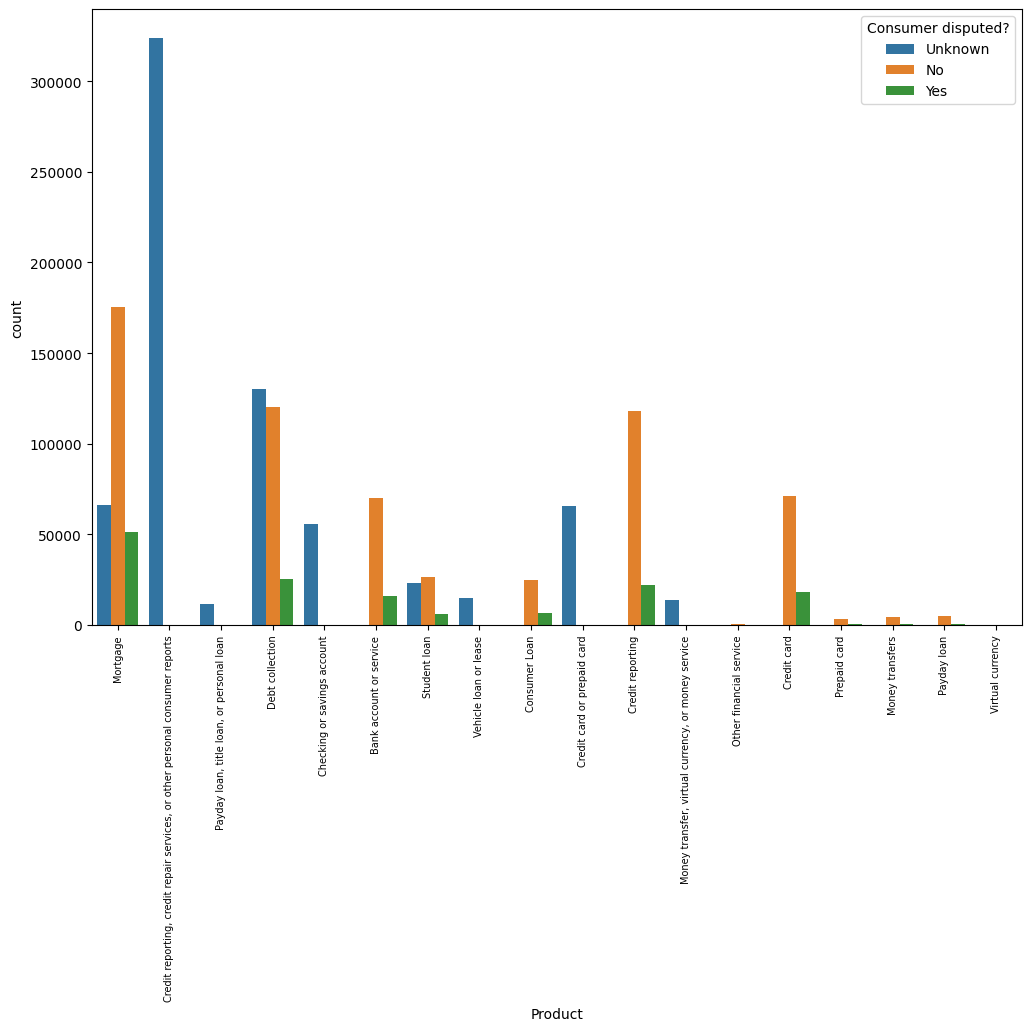

In [ ]:
# Per product
plt.figure(figsize=(12,8))
sns.countplot(data=df,
            x='Product',
            hue='Consumer disputed?'
            )
plt.xticks(rotation=90, fontsize=7)

Next, we're looking how timely the response to customer per product.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Mortgage'),
  Text(1, 0, 'Credit reporting, credit repair services, or other personal consumer reports'),
  Text(2, 0, 'Payday loan, title loan, or personal loan'),
  Text(3, 0, 'Debt collection'),
  Text(4, 0, 'Checking or savings account'),
  Text(5, 0, 'Bank account or service'),
  Text(6, 0, 'Student loan'),
  Text(7, 0, 'Vehicle loan or lease'),
  Text(8, 0, 'Consumer Loan'),
  Text(9, 0, 'Credit card or prepaid card'),
  Text(10, 0, 'Credit reporting'),
  Text(11, 0, 'Money transfer, virtual currency, or money service'),
  Text(12, 0, 'Other financial service'),
  Text(13, 0, 'Credit card'),
  Text(14, 0, 'Prepaid card'),
  Text(15, 0, 'Money transfers'),
  Text(16, 0, 'Payday loan'),
  Text(17, 0, 'Virtual currency')])

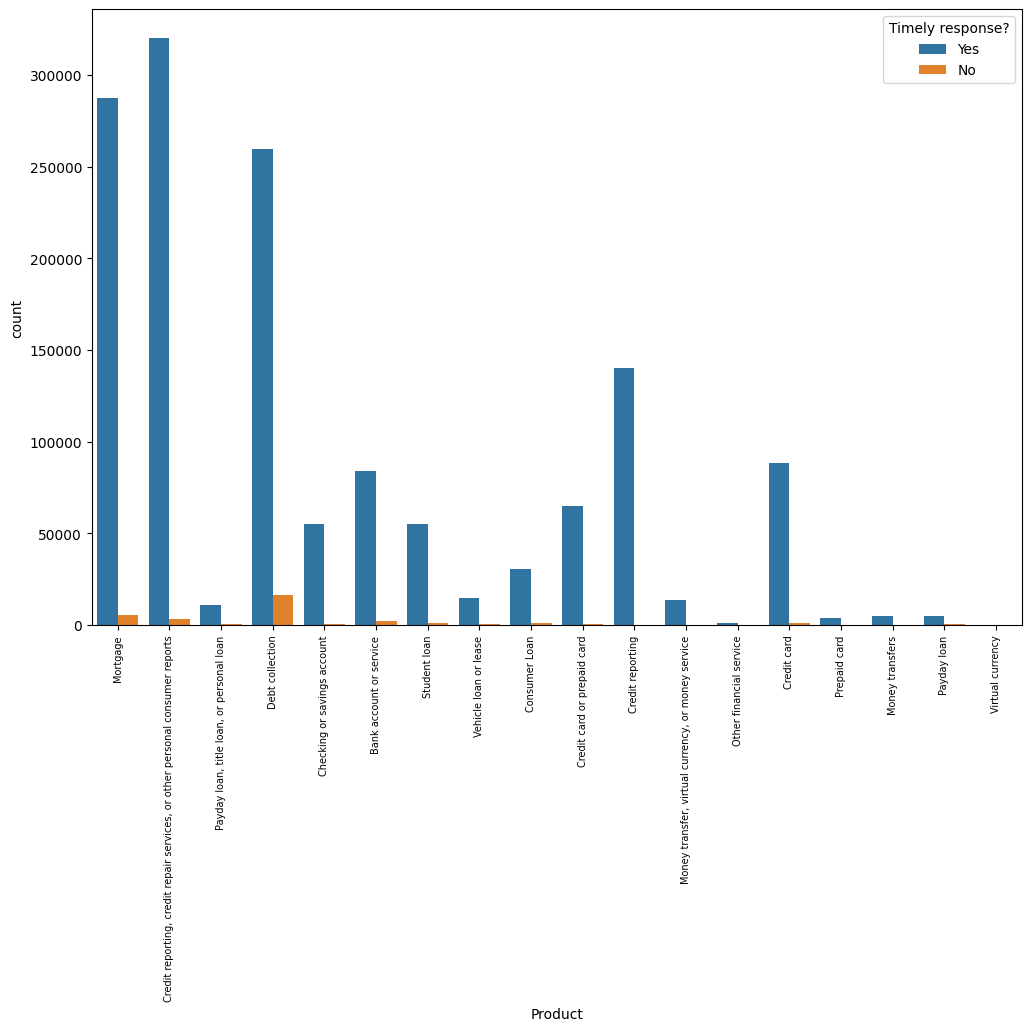

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,
            x='Product',
            hue='Timely response?'
            )
plt.xticks(rotation=90, fontsize=7)

Debt collection product has highest untimely response

In [ ]:
df['Consumer disputed?'].value_counts()

Unknown    705049
No         619980
Yes        148378
Name: Consumer disputed?, dtype: int64

As "unknown" labeled in grey area, customer tend to associate "unknown" as "no". Similarity between these 2 values is high because if someone disputed, chances are being recorded in court.   

In [ ]:
df['Company public response'].value_counts()

No     921457
Yes    551950
Name: Company public response, dtype: int64

In [ ]:
df['Timely response?'].value_counts(normalize=True)*100

Yes    97.645932
No      2.354068
Name: Timely response?, dtype: float64

In [ ]:
df[df['Consumer disputed?'] == 'Yes']['Company response to consumer'].value_counts()

Closed with explanation            122695
Closed with non-monetary relief     11098
Closed with monetary relief          5439
Closed without relief                4811
Closed                               3625
Closed with relief                    708
Untimely response                       2
Name: Company response to consumer, dtype: int64

In [ ]:
df[df['Consumer disputed?'] == 'Yes']['Timely response?'].value_counts()

Yes    145808
No       2570
Name: Timely response?, dtype: int64

In [ ]:
df[df['Consumer disputed?'] == 'Yes']['Company public response'].value_counts()

No     114872
Yes     33506
Name: Company public response, dtype: int64

In [ ]:
df['Company response to consumer'].value_counts()

Closed with explanation            1153588
Closed with non-monetary relief     190660
Closed with monetary relief          82341
Closed without relief                17868
Closed                               17611
Untimely response                     6034
Closed with relief                    5304
In progress                              1
Name: Company response to consumer, dtype: int64

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

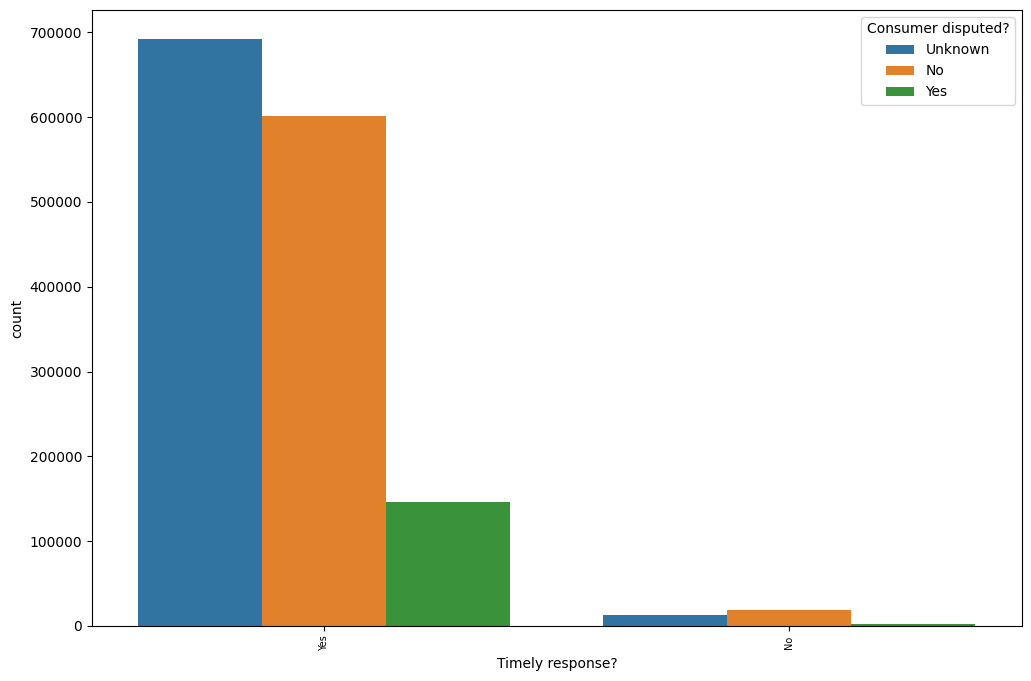

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,
            x='Timely response?',
            hue='Consumer disputed?'
            )
plt.xticks(rotation=90, fontsize=7)

(array([0, 1, 2]),
 [Text(0, 0, 'Unknown'), Text(1, 0, 'No'), Text(2, 0, 'Yes')])

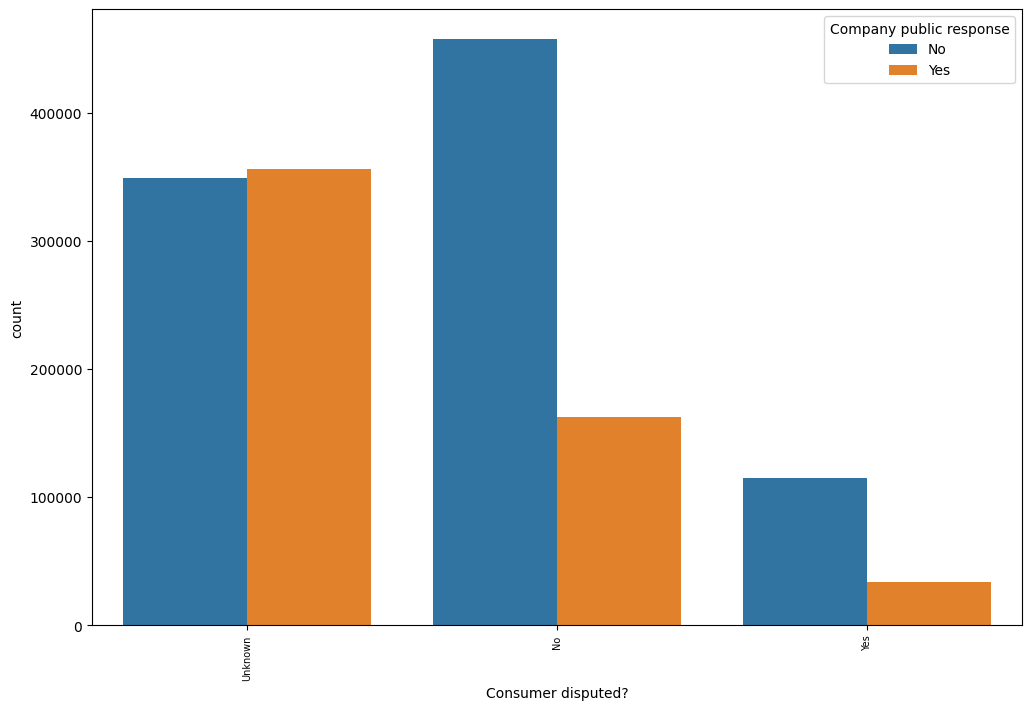

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,
            x='Consumer disputed?',
            hue='Company public response'
            )
plt.xticks(rotation=90, fontsize=7)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

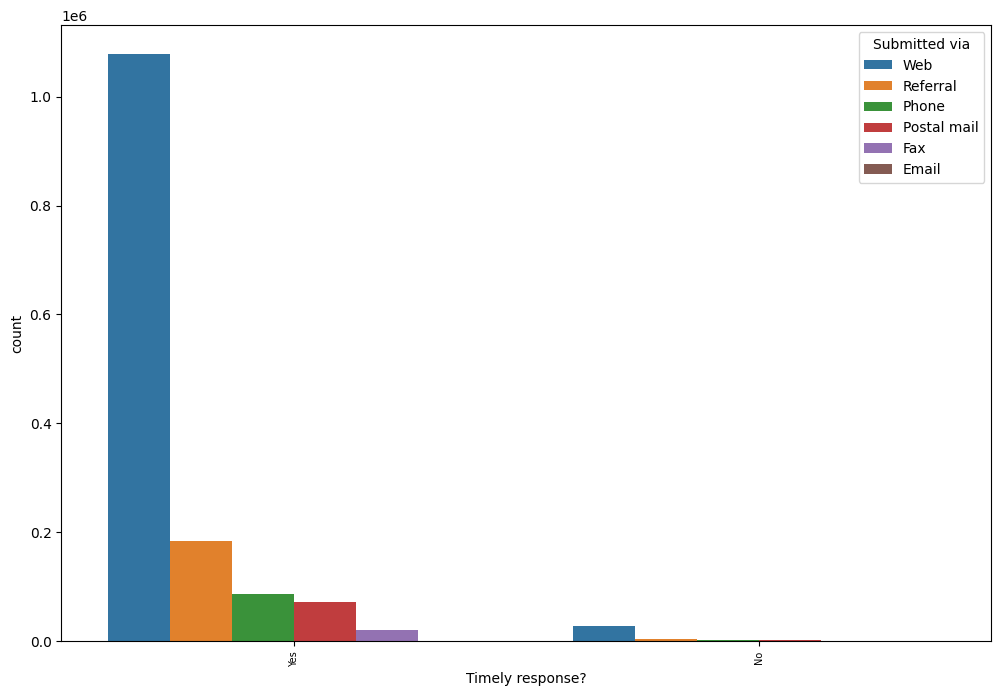

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,
            x='Timely response?',
            hue='Submitted via'
            )
plt.xticks(rotation=90, fontsize=7)

While complaining via web contributing highest timely response, it is also contributing untimely response. It can be understanding since the population size of "submitted via web" is also the highest  

In [ ]:
noresp = df[df['Consumer disputed?'].str.contains('Yes')]

companyworst15 = (noresp
                .groupby(['Company','Consumer disputed?'])
                .agg(count=('Company public response','count'))
                .sort_values('count',ascending=False)
                .reset_index())
companyworst15.head(15)

,Company,Consumer disputed?,count
0,"BANK OF AMERICA, NATIONAL ASSOCIATION",Yes,14387
1,WELLS FARGO & COMPANY,Yes,11717
2,"EQUIFAX, INC.",Yes,10079
3,JPMORGAN CHASE & CO.,Yes,9523
4,"CITIBANK, N.A.",Yes,6697
5,Ocwen Financial Corporation,Yes,5719
6,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Yes,5638
7,Experian Information Solutions Inc.,Yes,5330
8,NATIONSTAR MORTGAGE LLC,Yes,3758
9,CAPITAL ONE FINANCIAL CORPORATION,Yes,3655


In [ ]:
top3 = noresp[noresp['Company'].str.contains('EQUIFAX, INC|JPMORGAN CHASE & CO|BANK OF AMERICA, NATIONAL ASSOCIATION')]

top3['Company'].value_counts()

BANK OF AMERICA, NATIONAL ASSOCIATION    14387
EQUIFAX, INC.                            10079
JPMORGAN CHASE & CO.                      9523
Name: Company, dtype: int64

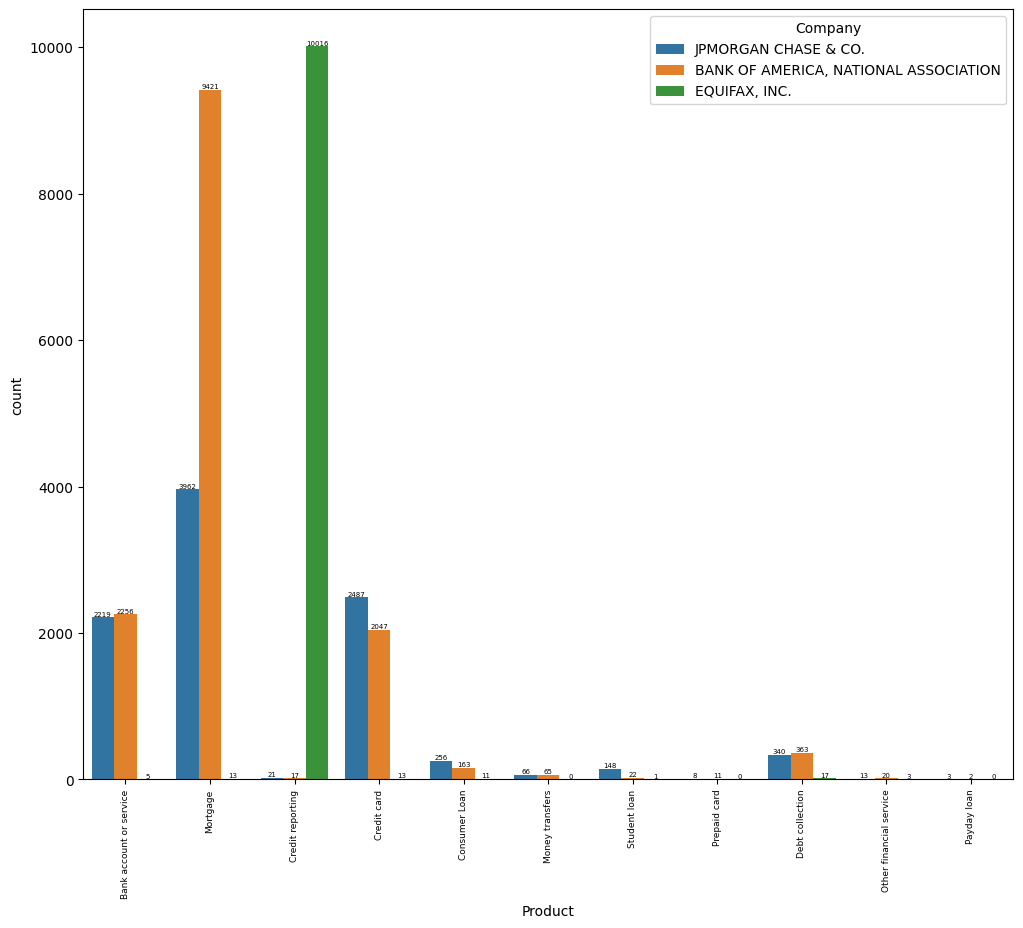

In [ ]:
plt.figure(figsize=(12,10))
ax = sns.countplot(data=top3,
            x='Product',
            hue='Company'
            )

plt.xticks(rotation=90, fontsize=6.5)
for label in ax.containers:
    ax.bar_label(label,size=5)
plt.show()

## Feature Engineering

### Reducing Cardinality

Some feature we needed for modeling have too much unique values. To maintain it we reduce unique values by maintaning 80% threshold, while the rest rename to "Other"

In [ ]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.8,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other
  new_column=column.apply(lambda x: x if x in categories_list else 'Other')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column

df['Product'],new_category_list=cumulatively_categorise(df['Product'],return_categories_list=True)
df['Submitted via'],new_category_list=cumulatively_categorise(df['Submitted via'],return_categories_list=True)
df['Company response to consumer'],new_category_list=cumulatively_categorise(df['Company response to consumer'],return_categories_list=True)


In [ ]:
df['Product'].value_counts(normalize=True)

Credit reporting, credit repair services, or other personal consumer reports    0.219592
Mortgage                                                                        0.199128
Debt collection                                                                 0.187157
Other                                                                           0.179773
Credit reporting                                                                0.095309
Credit card                                                                     0.060533
Bank account or service                                                         0.058507
Name: Product, dtype: float64

To model the data, we need to select just the column we need. We don't select column Sub-product, Sub-issue, state, zip code because they have too much missing value and not too influential                           

In [ ]:
encoding = df[['Product','Company public response','Consumer consent provided?','Submitted via','Timely response?','Consumer disputed?','Company response to consumer']]
encoding = encoding.copy()
encoding.head()



,Product,Company public response,Consumer consent provided?,Submitted via,Timely response?,Consumer disputed?,Company response to consumer
0,Mortgage,No,Consent provided,Web,Yes,Unknown,Closed with explanation
1,Mortgage,No,Consent provided,Web,Yes,Unknown,Closed with explanation
2,Mortgage,No,Unknown,Web,Yes,No,Closed with explanation
3,"Credit reporting, credit repair services, or o...",Yes,Consent not provided,Web,Yes,Unknown,Closed with explanation
4,Other,No,Consent not provided,Web,Yes,Unknown,Closed with explanation


In [ ]:
encoding['Company public response'] = encoding['Company public response'].replace("No", 0).replace("Yes", 1)
encoding['Timely response?'] = encoding['Timely response?'].replace("No", 0).replace("Yes", 1)
encoding['Consumer disputed?'] = encoding['Consumer disputed?'].replace("No", 0).replace("Yes", 1).replace("Unknown", 0)
encoding

,Product,Company public response,Consumer consent provided?,Submitted via,Timely response?,Consumer disputed?,Company response to consumer
0,Mortgage,0,Consent provided,Web,1,0,Closed with explanation
1,Mortgage,0,Consent provided,Web,1,0,Closed with explanation
2,Mortgage,0,Unknown,Web,1,0,Closed with explanation
3,"Credit reporting, credit repair services, or o...",1,Consent not provided,Web,1,0,Closed with explanation
4,Other,0,Consent not provided,Web,1,0,Closed with explanation
...,...,...,...,...,...,...,...
1473402,Credit card,0,Unknown,Referral,1,0,Other
1473403,Credit card,0,Unknown,Web,1,0,Closed with explanation
1473404,Credit card,1,Consent not provided,Web,1,0,Closed with non-monetary relief
1473405,Credit card,0,Unknown,Web,1,1,Closed with explanation


In [ ]:
encoding.describe(include=[object])

,Product,Consumer consent provided?,Submitted via,Company response to consumer
count,1473407,1473407,1473407,1473407
unique,7,5,3,3
top,"Credit reporting, credit repair services, or o...",Unknown,Web,Closed with explanation
freq,323549,593785,1104894,1153588


In [ ]:
encoding['Consumer disputed?'].value_counts(normalize=True)

0    0.899296
1    0.100704
Name: Consumer disputed?, dtype: float64

In [ ]:
data =pd.get_dummies(data=encoding,columns=['Product','Consumer consent provided?',
                                            'Submitted via','Company response to consumer'],drop_first=True)
data

,Company public response,Timely response?,Consumer disputed?,Product_Credit card,Product_Credit reporting,"Product_Credit reporting, credit repair services, or other personal consumer reports",Product_Debt collection,Product_Mortgage,Product_Other,Consumer consent provided?_Consent provided,Consumer consent provided?_Consent withdrawn,Consumer consent provided?_Other,Consumer consent provided?_Unknown,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Other
0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473402,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
1473403,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1473404,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1473405,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0


# Modelling

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['Consumer disputed?'],axis = 1)
Y = data['Consumer disputed?']

In [ ]:
from imblearn.over_sampling import (RandomOverSampler)
resamp = RandomOverSampler()
balX, balY = resamp.fit_resample(X,Y)

# from imblearn.over_sampling import SMOTE
# X_sm, y_sm = sm.fit_resample(X, Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(balX, balY, test_size=0.2, random_state=42)

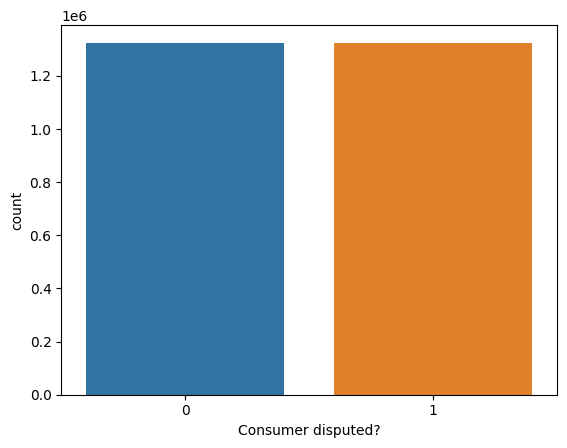

In [ ]:
sns.countplot(x=balY)
plt.show()

In [ ]:
# logreg = LogisticRegression(random_state=42)
# logreg.fit(X_train, y_train)
%%time

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)


rf = RandomForestClassifier()
rf.fit(X_train,y_train)

xgb = XGBClassifier()
xgb.fit(X_train,y_train)



CPU times: user 9min 42s, sys: 6.33 s, total: 9min 48s
Wall time: 7min 6s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt,digits=6))

              precision    recall  f1-score   support

           0   0.752998  0.617757  0.678706    264978
           1   0.676014  0.797403  0.731708    265034

    accuracy                       0.707590    530012
   macro avg   0.714506  0.707580  0.705207    530012
weighted avg   0.714502  0.707590  0.705210    530012



In [ ]:
print(classification_report(y_test, y_pred_rf,digits=6))

              precision    recall  f1-score   support

           0   0.753007  0.617753  0.678707    264978
           1   0.676015  0.797415  0.731714    265034

    accuracy                       0.707593    530012
   macro avg   0.714511  0.707584  0.705211    530012
weighted avg   0.714507  0.707593  0.705213    530012



In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb,digits=6))

              precision    recall  f1-score   support

           0   0.752823  0.617900  0.678721    264978
           1   0.676031  0.797166  0.731618    265034

    accuracy                       0.707542    530012
   macro avg   0.714427  0.707533  0.705170    530012
weighted avg   0.714423  0.707542  0.705173    530012



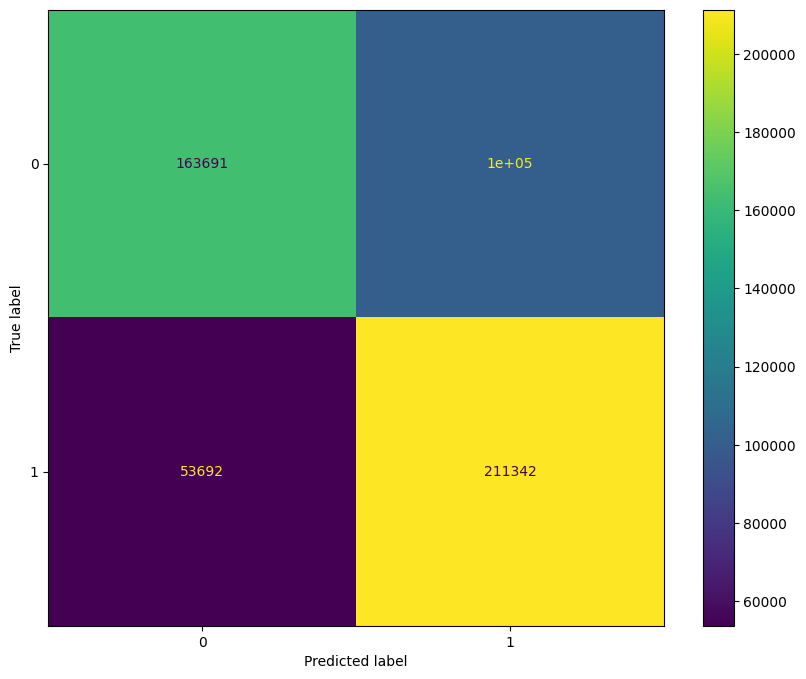

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,8))

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)
# and then predict y for the test inputs
y_pred_logreg = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_logreg,digits=4))

              precision    recall  f1-score   support

           0     0.7440    0.6141    0.6728    264978
           1     0.6715    0.7887    0.7254    265034

    accuracy                         0.7014    530012
   macro avg     0.7077    0.7014    0.6991    530012
weighted avg     0.7077    0.7014    0.6991    530012



# Hyperparameter tuning

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_randomcv = RandomizedSearchCV(rf, parameters, cv=5,
                                     scoring='recall', n_iter=10)
rf_randomcv.fit(X_train, y_train)

#13m 11s

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5),
                                        'n_estimators': (10, 20, 30, 40, 50)},
                   scoring='recall')

In [ ]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
7,"{'n_estimators': 20, 'max_depth': 5}",0.795868,1
2,"{'n_estimators': 50, 'max_depth': 5}",0.794197,2
3,"{'n_estimators': 10, 'max_depth': 5}",0.786827,3
8,"{'n_estimators': 10, 'max_depth': 2}",0.771662,4
6,"{'n_estimators': 10, 'max_depth': 3}",0.770533,5
4,"{'n_estimators': 40, 'max_depth': 2}",0.745078,6
9,"{'n_estimators': 50, 'max_depth': 1}",0.738318,7
0,"{'n_estimators': 30, 'max_depth': 1}",0.732417,8
5,"{'n_estimators': 20, 'max_depth': 2}",0.719635,9
1,"{'n_estimators': 10, 'max_depth': 1}",0.702721,10


In [ ]:
y_pred = rf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7272    0.5994    0.6572    264978
           1     0.6594    0.7752    0.7126    265034

    accuracy                         0.6873    530012
   macro avg     0.6933    0.6873    0.6849    530012
weighted avg     0.6933    0.6873    0.6849    530012



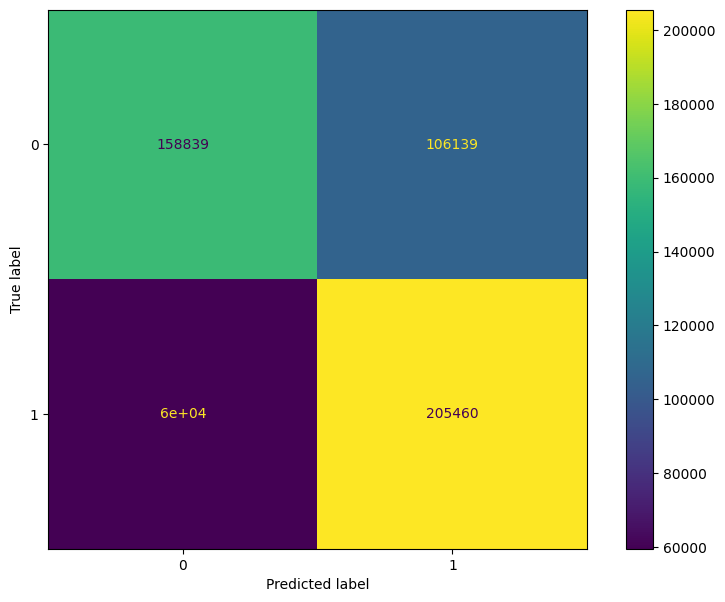

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()